### -----------------------------librerías extra

In [1]:
using ProgressMeter
using Cubature
using PyPlot
using Graf
using nintegrate

### ----------------------------constantes

### ----------------------------

In [2]:
const m = 1.0;
const hbarr = 1.0;
#n = 1.;
const ωz = 0.05;
const ωr = 7.0*ωz;
const n=1.;
const α=10.0;
const g_α=4.0*π*α;
const ωm=(ωr*ωz)^(1/3);
const μ=0.5*ωm*(15*α*sqrt(m*ωm))^(2.0/5.0);

const c = sqrt(n*g_α/m);

### -------------

### -------------parámetros característicos del solitón bosónico

In [3]:
ξ=0.9;
β=0.0;
algo=3.0
z0=algo*ξ;
γ=1/(sqrt(1-β^2));

In [4]:
γ

1.0

### ----Función de onda

In [5]:

function N(t::Float64)
    (1/sqrt(2*pi))*(ωr/sin(ωr*t))*sqrt(ωz/sin(ωz*t))
end

function sol(z::Float64)
(tanh((z-z0)/(ξ*γ)))/γ
end


function ϕ_rr1(r::Float64,r1::Float64,t::Float64)
    (m*ωr/(2*hbarr))*(r1^2+r^2)/tan(ωr*t)+ pi/4
end

function ϕ_zz1(z::Float64,z1::Float64,t::Float64)
    (m*ωz/(2*hbarr))*(z1^2+z^2)/tan(ωz*t)-2*z*z1*t/sin(ωz*t)
end

function Rre(r::Float64,r1::Float64,t::Float64)
    besselj0(-m*ωr*r*r1/(hbarr*sin(ωr*t)))*r1*cos(ϕ_rr1(r,r1,t))
end

function Rim(r::Float64,r1::Float64,t::Float64)
    besselj0(-m*ωr*r*r1/(hbarr*sin(ωr*t)))*r1*sin(ϕ_rr1(r,r1,t))
end

function Zre(z::Float64,z1::Float64,t::Float64)
    cos(ϕ_zz1(z,z1,t))*sol(z')-β*sin(ϕ_zz1(z,z1,t))
end

function Zim(z::Float64,z1::Float64,t::Float64)
    sin(ϕ_zz1(z,z1,t))*sol(z')+β*cos(ϕ_zz1(z,z1,t))
end

function U(r::Float64,z::Float64)
                    (1/2)*m*((ωr*r)^2 + (ωz*z)^2)
                    end

function n_tf(r::Float64,z::Float64)            
    if  μ-U(r,z)>0 0
        return (μ-U(r,z))/(n*g_α)              
    end
    return 0       
end

n_tf (generic function with 1 method)

In [6]:
const rmaxintegrar=sqrt(2*μ/m)/ωr;
const rminintegrar=0;
const zmaxintegrar=sqrt(2*μ/m)/ωz;
const zminintegrar=-sqrt(2*μ/m)/ωz;

rmaxevaluar=rmaxintegrar;
rminevaluar=0.0;
zmaxevaluar=zmaxintegrar;
zminevaluar=-zmaxevaluar;


# Reglas para sumar x+Dx_ωx y quedarse en el dominio de integracion

In [7]:
function valor_r1_abajo(r::Float64,dr::Float64)

    if  r-dr<0.0
        return 0.0
    end
    
    return r-dr;        
end



function valor_r1_arriba(r::Float64,dr::Float64,rmax::Float64)
    if  r+dr>rmax
        return rmax    
    end
    return r+dr;        
end


valor_z1_arriba(z,dz,zmax)=valor_r1_arriba(z,dz,zmax)

function valor_z1_abajo(z::Float64,dz::Float64,zmin::Float64)
    if  z-dz<zmin
        return zmin    
    end
    return z-dz;        
end

# Extraer el índice de un arreglo de números numéricamente

In [11]:
function indicializar_abajo(x,xmin,d)
    i0=(x-xmin)/d
    i0=round(Integer,floor(i0))+1
end

function indicializar_arriba(x,xmin,d)
    i0=(x-xmin)/d
    i0=round(Integer,ceil(i0))
end

indicializar_arriba (generic function with 1 method)

# Propagar Perfil inicial

# ----------------------------------------------------------------------------------------------

In [16]:
iteracionest=2
iteracionesr1=Integer(400);
iteracionesz1=Integer(400);
iteracionesr=Integer(100);
iteracionesz=Integer(100);

Dr1=(rmaxintegrar-rminintegrar)/iteracionesr1;
Dz1=(zmaxintegrar-zminintegrar)/iteracionesz1;

Dr=(rmaxevaluar-rminevaluar)/iteracionesr;
Dz=(zmaxevaluar-zminevaluar)/iteracionesz;

#Dr1_ωr=sqrt(hbarr/(m*ωr)); #Dr1_ωr>Dr1
#Dz1_ωz=sqrt(hbarr/(m*ωz)); #Dz1_ωz>Dr1

Dr1_ωr=Dr1*10;
Dz1_ωz=Dz1*10;
############valores en índices
dzl0=    round(Integer,Dz1_ωz/Dz1);
drk0=    round(Integer,Dr1_ωr/Dr1); #a lo más, se va a integrar 2*drk0*N_arbitrario puntos+1 al rededor de un punto dado (contando al punto)


# EL TIEMPO
t0=1/sqrt(ωr^2+ωz^2);

In [19]:
function mapear_funcion_2d_y_t(f::Function,x::Integer,xmin::Float64,Dx::Float64,y::Integer,Dy::Float64,t::Integer,Dt::Float64)
    mapeado=zeros(x+1,y+1,t)
   
    for l in 1:t
        t1=Dt*l
       
        for i in 1:x+1
            x1=(i-1)*Dx+xmin   

           
            for j in 1:y+1
                r1=(k-1)*Dr1;    
                #println("r1=$r1")
                mapeado[i,j,l]=f(x1,y1,t1);    
            end    
        
        end
    end

end

mapear_funcion_2d_y_t (generic function with 1 method)

In [20]:
t=t0*iteracionest;


#Arreglos vacíos para guardar los resultados

fRre=zeros(iteracionesr+1,iteracionesr1+1);
fRim=zeros(iteracionesz+1,iteracionesz1+1);

gZre=zeros(iteracionesz+1,iteracionesz1+1);
gZim=zeros(iteracionesz+1,iteracionesz1+1);


ReIntegral=zeros(iteracionesr+1,iteracionesz+1);
ImIntegral=zeros(iteracionesr+1,iteracionesz+1);


for i in 1: iteracionesr+1
    r=(i-1)*Dr   
    #println("r=====$r")
    for k in 1:iteracionesr1+1
        r1=(k-1)*Dr1;    
        #println("r1=$r1")
        fRre[i,k,]=Rre(r,r1,t);
        fRim[i,k]=Rim(r,r1,t);
        #comodin[i,j]=r*r1;
    end    
end


for j in 1: iteracionesz+1
    z=zminevaluar+(j-1)*Dz
    for l in 1:iteracionesz1+1                             
        z1=zminintegrar+(l-1)*Dz1;    
        gZre[j,l]=Zre(z,z1,t);
        gZim[j,l]=Zim(z,z1,t);
    
    end    
end


75

In [18]:
drk0*2

150

In [19]:
dzl0*2

150

In [20]:
zmaxintegrar/Dz1

200.0

In [21]:
rmaxintegrar/Dr1

399.99999999999994

In [22]:
zmaxevaluar-zminevaluar

48.51609668646931

In [23]:
Dz1_ωz

9.096768128712997

In [ ]:
p=Progress(iteracionesr+1,1)

tic()

for i in 1: iteracionesr+1
    #println("i====================$i") 
    r=(i-1)*Dr;    
   #println("r=============================================$r") 

    
    for j in 1: iteracionesz+1
        #println("j===========$j") 
        z=zminevaluar+(j-1)*Dz;    
        #println("z======================$z") 



        r1_minimo=valor_r1_abajo(r,Dr1_ωr); #r+Dr1_ωr con reglas
        r1_maximo=valor_r1_arriba(r,Dr1_ωr,rmaxintegrar); #r-Dr1_ωr con reglas

        z1_minimo=valor_z1_abajo(z,Dz1_ωz,zminintegrar); #z-Dz1_ωz con reglas
        z1_maximo=valor_z1_arriba(z,Dz1_ωz,zmaxintegrar); #z+Dz1_ωz con reglas



            for k in indicializar_abajo(r1_minimo,rminintegrar,Dr1): indicializar_arriba(r1_maximo,rminintegrar,Dr1)+1 #induce error de redondeo    
            #for k in 1: iteracionesr1+1
                r1=(k-1)*Dr1;

                #println("k====$k") 
                #println("r1===============$r1")
                #println("kmax====$(indicializar(r1_maximo,rminintegrar,Dr1))")

                #println("r1===","$r1")
                
                    for l in indicializar_abajo(z1_minimo,zminintegrar,Dz1): indicializar_arriba(z1_maximo,zminintegrar,Dz1)+1 #induce error de redondeo
                    #for l in 1:iteracionesz1+1
                    #println("l==$l")   


                        #println("$(indicializar(r1_minimo,rminintegrar,Dr1))", "$(indicializar(r1_maximo,rminintegrar,Dr1))")

                        #println("lmin==$(indicializar(z1_minimo,zminintegrar,Dz1))")
                        #println("lmax==$(indicializar(r1_minimo,zminintegrar,Dz1))")

                        z1=zminevaluar+(l-1)*Dz1;
                        #println("z1====$z1")

                        #println("z1=","$z1")




                        #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:

                        #ReIntegral[i,j]=ReIntegral[i,j]+n_tf(r1,z1)*(fRre[i,k]*gZre[j,l]-fRim[i,k]*gZim[j,l])#*Dr1*Dz1;   
                        #ImIntegral[i,j]=ImIntegral[i,j]+n_tf(r1,z1)*(fRre[i,k]*gZim[j,l]+fRim[i,k]*gZre[j,l])#*Dr1*Dz1;


                        #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                        ReIntegral[i,j]=ReIntegral[i,j]+n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                        
                        ImIntegral[i,j]=ImIntegral[i,j]+n_tf(r1,z1)*(Rre(r,r1,t)*Zim(z,z1,t)+Rim(r,r1,t)*Zre(z,z1,t))*Dr1*Dz1;
                    end

            end
        

    end

    next!(p)
end

toc()

In [ ]:
ReIntegral=ReIntegral*N(t);
ImIntegral=ImIntegral*N(t);
Z=ReIntegral.^2+ImIntegral.^2;
grafdensidad([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],length(ReIntegral[:,1]),Z,"Perfil Propagado a t=$DT *T0","z","r")    
savefig("fig$DT con $drk0 de r y $dzl0 de z resol de $iteracionesz*$iteracionesr.png")

# ----------------------------------------------------------------------------------------------

#El perfil inicial 

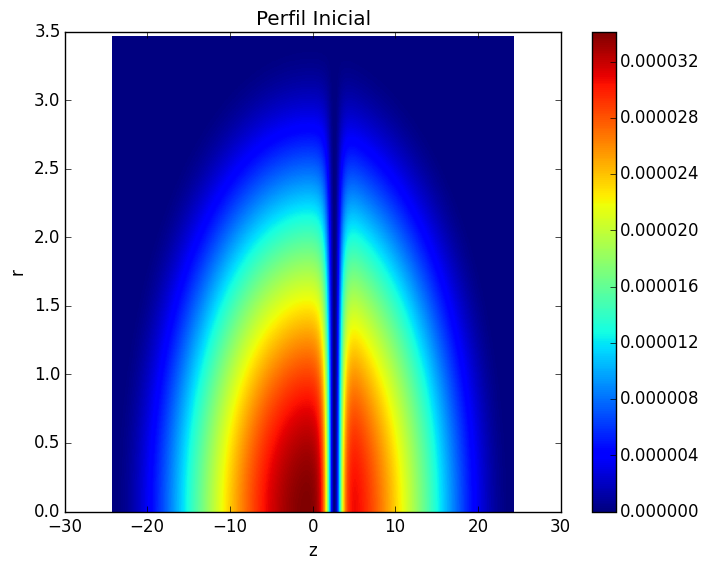

In [27]:
resolucion=1000;

perfilinicial=zeros(resolucion+1,resolucion+1)

function FUNCIONTF0(r::Float64,z::Float64)
    n_tf(r,z)*(sol(z)+im*β)
end

function ρ0(r::Float64,z::Float64)
    FUNCIONTF0(r,z) *conj(FUNCIONTF0(r,z))
end

perfilinicial=gencodominio2D([zminintegrar,zmaxintegrar],[rminintegrar,rmaxintegrar],resolucion,ρ0);
grafdensidad([zminintegrar,zmaxintegrar],[rminintegrar,rmaxintegrar],resolucion+1, perfilinicial,"Perfil Inicial","z","r")
savefig("perfilinicial con ksi=$ξ,z0=$algo*ksi.png")

In [ ]:
genco

## líneas de nivel

for i in 1:100
    z=linspace(zmin,zmax,resolucion)
    PyPlot.plot(z,perfilinicial[i,:]')
    PyPlot.xlabel("z")
    PyPlot.ylabel("ρ")
    PyPlot.title("dejando r constante y variando z")
    #PyPlot.legend("$i")
end

for i in 1:100
        r=linspace(0,rmax,resolucion)

    PyPlot.plot(r,perfilinicial[:,i])
    #PyPlot.legend("$i")
    PyPlot.xlabel("r")
    PyPlot.ylabel("ρ")
    PyPlot.title("Dejando z constante y variando r")
end

In [190]:
rmaxintegrar

3.4654354776049505

## Es lo mismo que con las hcubature (faltan las expresiones en forma vectorial):

In [164]:
function Φ_real_entreNt(v::Array{Float64,1},r,z,t)
    sqrt(n_tf(v[1],v[2]))*(Rre(r,v[1],t)*Zre(z,v[2],t)-Rim(r,v[1],t)*Zim(z,v[2],t))
end
        
function Φ_imag_entreNt(v::Array{Float64,1},r,z,t)
    sqrt(n_tf(v[1],v[2]))*(Rre(r,v[1],t)*Zim(z,v[2],t)+Rim(r,v[1],t)*Zre(z,v[2],t))
end



Φ_imag_entreNt (generic function with 1 method)

In [389]:
Φ_imag_entreNt([1.05,1.02],1.01,1.01,1.0)

0.05050658569502065

In [391]:
p=Progress(iteracionesr+1,1)

wre= zeros(iteracionesr+1,iteracionesz+1);    
wim= zeros(iteracionesr+1,iteracionesz+1);


tic()
for i in 1: iteracionesr+1
    #println("i====================$i") 
    r=(i-1)*Dr;    
   

    for j in 1: iteracionesz+1
        #println("j===========$j") 
        z=zminevaluar+(j-1)*Dz;    

        f(v)=Φ_real_entreNt(v,r,z,t)
        g(v)=Φ_imag_entreNt(v,r,z,t)
      
        (val,err) = hcubature(f,[rmaxintegrar,zmaxintegrar], [0.0,zminintegrar]; reltol=1e-6, abstol=1e-6, maxevals=100000);
        (val2,err) = hcubature(g,[rmaxintegrar,zmaxintegrar], [0.0,zminintegrar]; reltol=1e-6, abstol=1e-6, maxevals=100000);
        
        wre[i,j]=val
        wim[i,j]=val2     
  
    end

    next!(p)
end

toc()



Use "Φ_real_entreNt(" instead.

Use "Φ_imag_entreNt(" instead.


Progress: 100% Time: 1:26:23


5182.791920767

In [450]:
Z=wre.^2+wim.^2;




In [22]:
const xminI=[0.0, -sqrt(2*μ/m)/ωz];
const xmaxI=[sqrt(2*μ/m)/ωr, sqrt(2*μ/m)/ωz];

ψr10t0=nintegrar4Dmasunoa2Dmasuno(Φ_real_entreNt,[zminevaluar,zmaxevaluar],[rminevaluar,rmaxevakyar],10*t0,xminI,xmaxI,100,100);
ψi10t0=nintegrar4Dmasunoa2Dmasuno(Φ_imag_entreNt,[zminevaluar,zmaxevaluar],[rminevaluar,rmaxevakyar],10*t0,xminI,xmaxI,100,100);


LoadError: rmaxevakyar not defined
while loading In[22], in expression starting on line 4

In [92]:
p=Progress(iteracionesr+1,1)

tic()

for i in 1: iteracionesr+1
    #println("i====================$i") 
    r=(i-1)*Dr;    
   

    for j in 1: iteracionesz+1
        #println("j===========$j") 
        z=zminevaluar+(j-1)*Dz;    




        #for k in indicializar_abajo(r1_minimo,rminintegrar,Dr1): indicializar_arriba(r1_maximo,rminintegrar,Dr1) #induce error de redondeo    
        for k in 1: iteracionesr1+1
            r1=(k-1)*Dr1;
            
            #println("k====$k") 
            #println("kmin====$(indicializar(r1_minimo,rminintegrar,Dr1))")
            #println("kmax====$(indicializar(r1_maximo,rminintegrar,Dr1))")

            #println("r1===","$r1")

            #for l in indicializar_abajo(z1_minimo,zminintegrar,Dz1): indicializar_arriba(z1_maximo,zminintegrar,Dz1) #induce error de redondeo
            for l in 1:iteracionesz1+1
            #println("l==$l")   

                #println("$(indicializar(r1_minimo,rminintegrar,Dr1))", "$(indicializar(r1_maximo,rminintegrar,Dr1))")

                #println("lmin==$(indicializar(z1_minimo,zminintegrar,Dz1))")
                #println("lmax==$(indicializar(r1_minimo,zminintegrar,Dz1))")
                
                z1=zminintegrar+(l-1)*Dz1;

                #println("z1=","$z1")
             
                
                
                
                #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                    
                ReIntegral[i,j]=n_tf(r1,z1)*(fRre[i,k]*gZre[j,l]-fRim[i,k]*gZim[j,l])*Dr1*Dz1;   
                ImIntegral[i,j]=n_tf(r1,z1)*(fRre[i,k]*gZim[j,l]+fRim[i,k]*gZre[j,l])*Dr1*Dz1;
            
            
                #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                #   ReIntegral[i,j]=n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                 #  ImIntegral[i,j]=n_tf(r1,z1)*(Rre(r,r1,t)*Zim(z,z1,t)+Rim(r,r1,t)*Zre(z,z1,t))*Dr1*Dz1;
            end
        
        end
        
  
    end

    next!(p)
end

toc()

Progress: 100% Time: 1:14:25
elapsed time: 4464.601745732 seconds


4464.601745732

In [19]:
ReIntegral

101x101 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

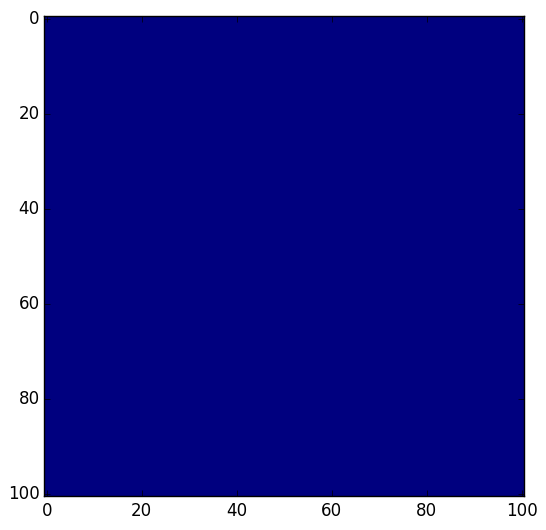

PyObject <matplotlib.image.AxesImage object at 0x7fd3832ce7d0>

In [93]:
Z=ReIntegral.^2+ImIntegral.^2
imshow(Z)

# esto

In [86]:
tic()
ψr_entre_10=nintegrar4Dmasunoa2Dmasuno(Φ_real_entreNt,[0.0,rmaxevaluar],[zminevaluar,zmaxevaluar],t0/10,[0.0,zminintegrar],[rmaxintegrar,zmaxintegrar],100,100);
toc()

Progress: 100% Time: 1:14:35
te da una matríz Z de 101 X 101 donde Z(i->x,j->y) son los puntos integrados de g 
elapsed time: 4474.746841809 seconds


4474.746841809

In [87]:
tic()
ψi_entre_10=nintegrar4Dmasunoa2Dmasuno(Φ_real_entreNt,[0.0,rmaxevaluar],[zminevaluar,zmaxevaluar],10*t0,[0.0,zminintegrar],[rmaxintegrar,zmaxintegrar],100,100);
toc()

Progress: 100% Time: 1:16:41
te da una matríz Z de 101 X 101 donde Z(i->x,j->y) son los puntos integrados de g 
elapsed time: 4601.005729074 seconds


4601.005729074

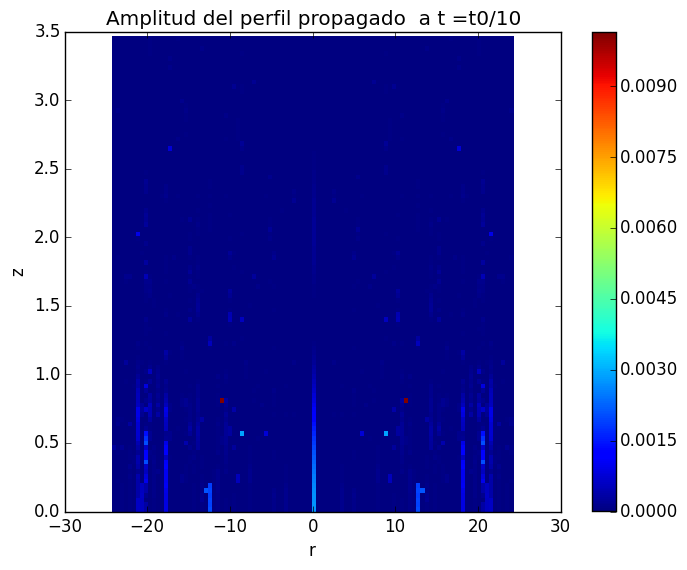

PyObject <matplotlib.colorbar.Colorbar instance at 0x7fd383658290>

In [88]:
F_entre_10=(ψr10.^2+ψi10.^2)*N(10*t0)^2;
grafdensidad([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],iteracionesr+1,F10,"Amplitud del perfil propagado  a t =t0/10","r","z")

# también

In [64]:
ψr5=nintegrar4Dmasunoa2Dmasuno(Φ_real_entreNt,[0.0,rmaxevaluar],[zminevaluar,zmaxevaluar],5*t0,[0.0,zminintegrar],[rmaxintegrar,zmaxintegrar],100,100);

Progress: 100% Time: 0:48:11
te da una matríz Z de 101 X 101 donde Z(i->x,j->y) son los puntos integrados de g 


In [65]:
ψi5=nintegrar4Dmasunoa2Dmasuno(Φ_real_entreNt,[0.0,rmaxevaluar],[zminevaluar,zmaxevaluar],5*t0,[0.0,zminintegrar],[rmaxintegrar,zmaxintegrar],100,100);


Progress: 100% Time: 0:49:10
te da una matríz Z de 101 X 101 donde Z(i->x,j->y) son los puntos integrados de g 


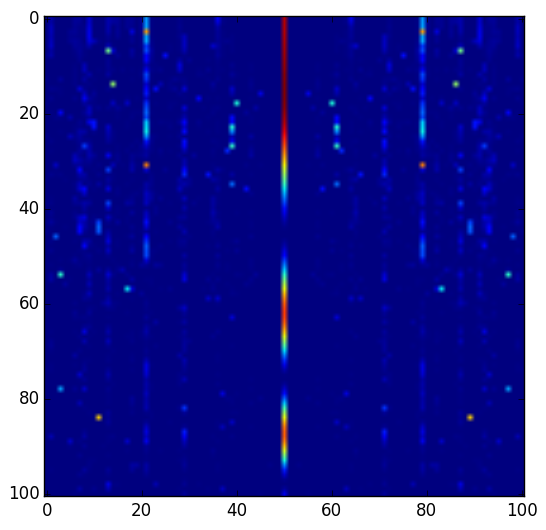

PyObject <matplotlib.image.AxesImage object at 0x7fd386870210>

In [66]:
F5=(ψr5.^2+ψi5.^2)*N(5*t0)^2;
imshow(F5)

### y siguen faltando...

p=Progress(iteracionesr+1,1)
for i in 1: iteracionesr+1
    r=(i-1)*Dr;    
    #println("r==========$i")
    for j in 1: iteracionesz+1
        z=zminevaluar+(j-1)*Dz;
        #println("z=====$j")
        for k in 1: drk0
        #for k in 1:iteracionesr1+1     
            r1=(k-1)*Dr1;
            #println("r1===$k")
            for l in l0-Numz: l0+Numz
            #for l in 1:iteracionesz1+1
                z1=zminintegrar+(l-1)*Dz1;
                #println("z1=$l")
                
                #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                ReIntegral[i,j]=ReIntegral[i,j]+integrarfunción de onda en todo el dominio de r1,z1;
                ImIntegral[i,j]=ImIntegral[i,j]+integrarfunción de onda en todo el dominio de r1,z1;
            
            
                #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                #ReIntegral[i,j]=ReIntegral[i,j]+n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                #ImIntegral[i,j]=ImIntegral[i,j]+n_tf(r1,z1)*(fRre[i,k]*gZim[j,l]+fRim[i,k]*gZre[j,l])*Dr1*Dz1;
            end
        
        end
        
    end

    next!(p)
end


ReIntegral=ReIntegral*N(t);
ImIntegral=ImIntegral*N(t);

Z=ReIntegral.^2+ImIntegral.^2;
grafdensidad([zminevaluar,zmaxevaluar],[rminevaluar,rmaxevaluar],101,Z,"eso","z","r")    

In [101]:
typeof([1,2,3])

Array{Int64,1}

vectorizar_funcion_2_variables (generic function with 1 method)

In [121]:
f(x,y,z,t)=x^2+y^2;

g(v)=vectorizar_funcion_4_variables(f,v)

g (generic function with 1 method)

In [126]:
methods(Zre)

# 1 method for generic function "Zre":
Zre(z::Float64,z1::Float64,t::Float64) at In[4]:28